In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Práctica 2: Optimizar función

Usaremos el paquete [Pygad](https://pygad.readthedocs.io/en/latest/) para hallar _óptimos_ de una función diferenciable.

## Objetivo

Hallar el _óptimo_ de la función

$$
f(x,y)=(x-2)^2+(y-2)^2
$$

```{figure} ./images/ga_funcion2variables.png
Función de dos variables
```

Sabemos que $f$ tiene un mínimo (local) en el punto $(2,2)$. __¿Cómo?__

Vamos a comprobar si el __algoritmo genético__ es capaz de hallar dicho punto.

In [37]:
def fitness_func(solution, solution_idx):
    
    x,y=solution
    fvalue = (x-2)**2+(y-2)**2
    # maximization problem
    return 1/fvalue #attention possible inf

fitness_function = fitness_func

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#life-cycle-of-pygad
def on_generation(ga):
    print('Generación',ga.generations_completed)
    print(ga.population)

def on_start(ga):
    print('Starting generation',ga.generations_completed)
    print(ga.population)

### Parámetros

https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class

In [38]:
num_generations = 25

# num_parents_mating: Number of solutions to be selected as parents.
num_parents_mating = 4

# sol_per_pop: Number of solutions (i.e. chromosomes) within the population. 
#This parameter has no action if initial_population parameter exists.
sol_per_pop = 20

population_list=[[10,10],
                 [-10,-10],
                 [10,-10],
                 [-10,10]
                 ]

#num_genes: Number of genes in the solution/chromosome. 
#This parameter is not needed if the user feeds the initial population to the initial_population parameter
num_genes = 2

# mutation_num_genes=None: Number of genes to mutate which defaults to None meaning that no number is specified.
mutation_num_genes = 2

#init_range_low=-4: The lower value of the random range from which the gene values 
#in the initial population are selected. 
#init_range_low defaults to -4.
init_range_low=-10
init_range_high=10

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#supported-parent-selection-operations
parent_selection_type= "sss"

#keep_parents=-1: Number of parents to keep in the current population. 
#-1 (default) means to keep all parents in the next population. 
#0 means keep no parents in the next population. 
#A value greater than 0 means keeps the specified number of parents in the next population. 
#Note that the value assigned to keep_parents cannot be < - 1 
#or greater than the number of solutions within the population sol_per_pop.
keep_parents = 1

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#data-type-for-all-genes-without-precision
gene_type=float

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#supported-crossover-operations
crossover_type = "two_points"

#https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#supported-mutation-operations
mutation_type="random"

# mutation_percent_genes="default": Percentage of genes to mutate. 
#It defaults to the string "default" which is later translated into the integer 10 
#which means 10% of the genes will be mutated. 
#It must be >0 and <=100. 
#Out of this percentage, the number of genes to mutate is deduced 
#which is assigned to the mutation_num_genes parameter. 
mutation_percent_genes = 10

### Definición del algoritmo genético

In [39]:
import pygad

In [40]:
ga_instance = pygad.GA(num_generations=num_generations,
                       sol_per_pop=sol_per_pop,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       num_genes=num_genes,
                       mutation_num_genes=mutation_num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       gene_type=gene_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True,
                       on_generation=on_generation,
                       on_start=on_start)

### Llamada a la optimización

In [41]:
ga_instance.run()

Starting generation 0
[[ 2.53974428  5.81285472]
 [-5.81462025 -0.50334027]
 [-8.9505415   9.92228268]
 [-2.12990192  2.91467536]
 [ 3.5804647  -2.34643516]
 [-5.59325851 -8.72994256]
 [ 5.55187287 -2.87790411]
 [-0.18061166  3.08248029]
 [ 7.03280787 -9.73815422]
 [-6.4022384  -9.80241036]
 [ 6.05735282 -7.38072429]
 [-5.09071877  1.29955541]
 [ 2.55536533 -9.36907252]
 [-5.58566782 -7.58511934]
 [ 5.40556705  4.74422884]
 [ 7.6392381   2.16882413]
 [-0.58425058 -3.35527814]
 [ 1.43701343 -6.64651431]
 [-6.09820832 -6.44150215]
 [-7.97886235  3.14084478]]
Generación 1
[[-0.18061166  3.08248029]
 [-1.07229259  5.42906813]
 [ 2.59312212  2.83973475]
 [-2.85823675  4.05672118]
 [-0.97120499  4.05547222]
 [ 1.77658934  3.93613654]
 [ 1.66441418  2.17014678]
 [ 4.85729802  2.9565629 ]
 [-0.94386463  5.51776534]
 [ 3.5234184   3.97415269]
 [-1.94881701  5.22711876]
 [ 4.8354957   2.40935679]
 [-0.71485495  4.25947974]
 [-0.57654026  6.56235749]
 [ 3.31998367  3.69491158]
 [ 4.51997604  1.98

### Resultados

In [42]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

In [43]:
print("best_solution: {solution}".format(solution =solution)) 

best_solution: [2.00225489 1.94877184]


In [44]:
print("best_solution fitness: {}".format(solution_fitness))
print("Valor de f: {}".format(1/solution_fitness))

best_solution fitness: 380.3135662219239
Valor de f: 0.002629409226534063


In [45]:
solution_idx

0

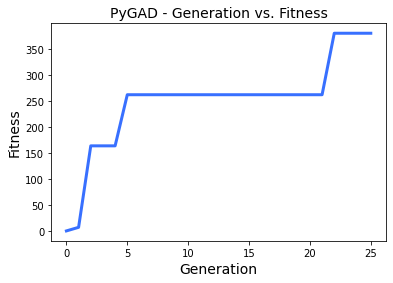

In [46]:
ga_instance.plot_fitness()
plt.close()

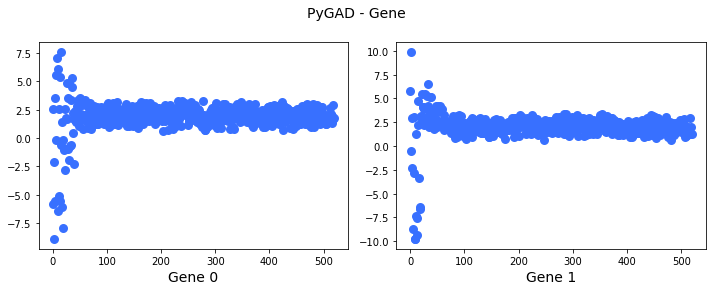

In [47]:
ga_instance.plot_genes(plot_type="scatter")
plt.close()

In [48]:
ga_instance.population

array([[2.00225489, 1.94877184],
       [1.79067816, 2.06782921],
       [1.77594414, 2.28419635],
       [1.68615585, 2.75153269],
       [1.22108602, 1.32742563],
       [1.27614773, 2.84944911],
       [1.82180852, 1.44470986],
       [1.88027363, 0.92749158],
       [1.88074052, 1.06015663],
       [2.07781763, 2.1033237 ],
       [1.45875609, 1.19969347],
       [2.04729849, 2.05014695],
       [2.67489218, 1.52140703],
       [2.13180332, 1.81107757],
       [2.06527786, 1.90747869],
       [1.96656   , 1.22568704],
       [1.29113499, 1.30512355],
       [1.65678184, 2.93761566],
       [2.9273828 , 2.02828369],
       [1.75768758, 1.27087032]])